In [109]:
import pandas as pd
from collections import Counter
import numpy as np
from matplotlib import pyplot as plt


## US Hurricane Data: 1851-2020

In [59]:
df = pd.read_csv("data/hurricane_data.csv")
df

,Year,Month,States Affected and Category by States,Highest Saffir-Simpson U.S. Category,Central Pressure (mb),Max Wind (kt),Name
0,1850s,NaN,NaN,NaN,NaN,NaN,NaN
1,1851,Jun,"TX, C1",1.0,974.0,80,-----
2,1851,Aug,"FL, NW3; I-GA, 1",3.0,955.0,100,"""Great Middle Florida"""
3,1852,Aug,"AL, 3; MS, 3; LA, 2; FL, SW2, NW1",3.0,961.0,100,"""Great Mobile"""
4,1852,Sep,"FL, SW1",1.0,982.0,70,-----
...,...,...,...,...,...,...,...
350,2020,Aug,"NC, 1; SC, 1",1.0,986.0,80,Isaias
351,2020,Aug,"LA, 4; TX, N1",4.0,938.0,130,Laura
352,2020,Sep,"AL, 2; FL, NW2",2.0,965.0,95,Sally
353,2020,Oct,"LA,2",2.0,970.0,85,Delta


In [60]:
df.dtypes

Year                                       object
Month                                      object
States Affected and Category by States     object
Highest Saffir-Simpson U.S. Category      float64
Central Pressure (mb)                     float64
Max Wind (kt)                              object
Name                                       object
dtype: object

In [61]:
# 
df = df[(df.Year.str.contains("s")) == False]
df = df[(df.Month.str.contains("None")) == False]
df = df.replace("Sp-Oc", "Sep")
df = df.replace("Jl-Au", "Jul")

In [62]:
# Use the handy Pandas to-datetime method to convert the three
# letter month abbreviations to numbers between 1 and 12
df.Month = pd.to_datetime(df.Month, format="%b").dt.month

In [63]:
# Tighten up the heades a bit so they're a bit easier to both read
# and reference in our code

df.columns = ["Year", "Month", "States", "Category", "Pressure", "Max Wind", "Name"]

In [64]:
# Convert the Year data from string objects to integers, 
# why? Python won't know how to work with them appropiately. 

# Convert the null(----) values in Max Wind to NaN - which numpy will read as "Not a number"
# Conver the data in Max Wind from object to float

df = df.astype({"Year": "int"})
df = df.replace("-----", np.NAN)
df = df.astype({"Max Wind": "float"})

In [65]:
df.dtypes


Year          int64
Month         int64
States       object
Category    float64
Pressure    float64
Max Wind    float64
Name         object
dtype: object

### Presenting Hurrican Data

In [75]:
df["Category"].value_counts()

1.0    124
2.0     85
3.0     62
4.0     26
5.0      4
Name: Category, dtype: int64

array([[<AxesSubplot:title={'center':'Year'}>]], dtype=object)

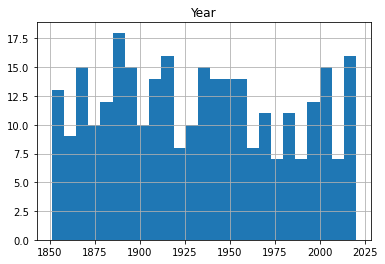

In [73]:
# tdf.hist(column="Year", bins=25)

In [118]:
# To allow us to focus on each metrics, we shall plot three seperate graphs
# Create 3 new data frames and populate each one with the contents of Year and their respective dat columns


df_category = df[["Year", "Category"]]
df_wind = df[["Year", "Max Wind"]]
df_pressure = df[["Year", "Pressure"]]
df_month = df[["Year", "Month"]]

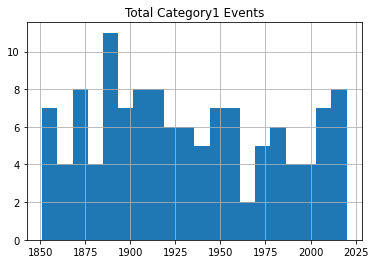

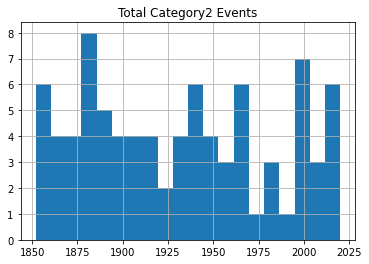

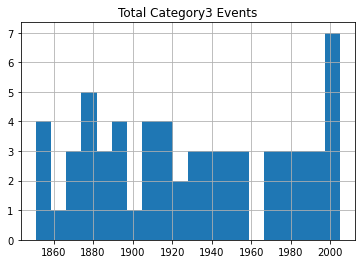

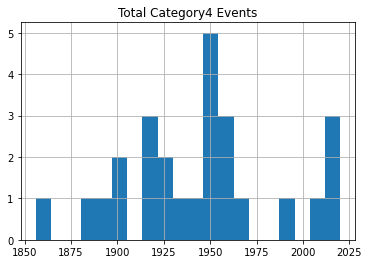

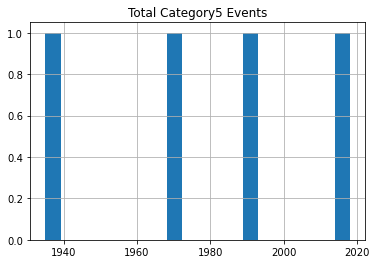

In [93]:
for x in range(1,6):
    cat_num = x
    converted_num = str(cat_num)
    dfcat = df_category["Category"] == (x)
    df1 = df_category[dfcat]
    df1.hist(column="Year", bins=20)
    plt.title("Total Category" + (converted_num) + " Events")

     As can be observed, there's not noticeable evidence of significantly rising storm frequency over tome 

In [147]:
df_months = df[["Month"]]
df_months["Month"]


1       6
2       8
3       8
4       9
5      10
       ..
350     8
351     8
352     9
353    10
354    10
Name: Month, Length: 301, dtype: int64

In [148]:
month_with_hurricane = Counter(df_months["Month"])
month_with_hurricane

Counter({6: 19, 8: 80, 9: 110, 10: 60, 11: 3, 7: 29})

In [124]:
df

,Year,Month,States,Category,Pressure,Max Wind,Name
1,1851,6,"TX, C1",1.0,974.0,80.0,NaN
2,1851,8,"FL, NW3; I-GA, 1",3.0,955.0,100.0,"""Great Middle Florida"""
3,1852,8,"AL, 3; MS, 3; LA, 2; FL, SW2, NW1",3.0,961.0,100.0,"""Great Mobile"""
4,1852,9,"FL, SW1",1.0,982.0,70.0,NaN
5,1852,10,"FL, NW2; I-GA, 1",2.0,965.0,90.0,"""Middle Florida"""
...,...,...,...,...,...,...,...
350,2020,8,"NC, 1; SC, 1",1.0,986.0,80.0,Isaias
351,2020,8,"LA, 4; TX, N1",4.0,938.0,130.0,Laura
352,2020,9,"AL, 2; FL, NW2",2.0,965.0,95.0,Sally
353,2020,10,"LA,2",2.0,970.0,85.0,Delta


In [151]:
pd.crosstab(df["Category"], df["Year"])

Year,1851,1852,1853,1854,1855,1856,1857,1858,1859,1860,...,2007,2008,2011,2012,2014,2016,2017,2018,2019,2020
Category,,,,,,,,,,,,,,,,,,,,,
1.0,1,1,1,1,0,0,0,1,2,0,...,1,1,1,2,0,1,1,1,1,2
2.0,0,1,0,1,0,1,1,0,0,2,...,0,2,0,0,1,1,0,0,1,3
3.0,1,1,0,1,1,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
4.0,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,2,0,0,1
5.0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [137]:
# Groupby 
df.groupby(df["Category"] > 3.0).mean()

,Year,Month,Category,Pressure,Max Wind
Category,,,,,
False,1931.214022,8.546125,1.771218,968.701107,84.783465
True,1948.933333,8.800000,4.133333,934.466667,123.275862


array([[<AxesSubplot:title={'center':'Year'}>,
        <AxesSubplot:title={'center':'Month'}>]], dtype=object)

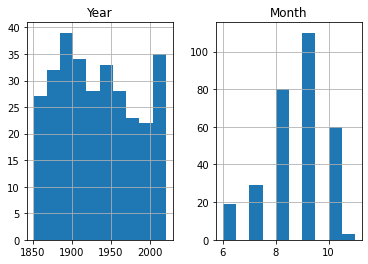

In [139]:
df_month.hist()

In [140]:
df

,Year,Month,States,Category,Pressure,Max Wind,Name
1,1851,6,"TX, C1",1.0,974.0,80.0,NaN
2,1851,8,"FL, NW3; I-GA, 1",3.0,955.0,100.0,"""Great Middle Florida"""
3,1852,8,"AL, 3; MS, 3; LA, 2; FL, SW2, NW1",3.0,961.0,100.0,"""Great Mobile"""
4,1852,9,"FL, SW1",1.0,982.0,70.0,NaN
5,1852,10,"FL, NW2; I-GA, 1",2.0,965.0,90.0,"""Middle Florida"""
...,...,...,...,...,...,...,...
350,2020,8,"NC, 1; SC, 1",1.0,986.0,80.0,Isaias
351,2020,8,"LA, 4; TX, N1",4.0,938.0,130.0,Laura
352,2020,9,"AL, 2; FL, NW2",2.0,965.0,95.0,Sally
353,2020,10,"LA,2",2.0,970.0,85.0,Delta


In [142]:
df["Month"].value_counts()

9     110
8      80
10     60
7      29
6      19
11      3
Name: Month, dtype: int64